In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from xgboost import XGBClassifier

import warnings 
warnings.filterwarnings('ignore')


In [104]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

# Exploratory Data Analysis

In [105]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [106]:
df.shape

(7043, 21)

In [107]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [108]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# check the descriptive statistics of numerical variables



In [110]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen is categorical hence the 25%,50%,75% distibution is not propoer

75% customers have have tenure less than 55 months

Average Monthly charges are USD 64.76 Whereas 25% customers pay more than 89.85 per month

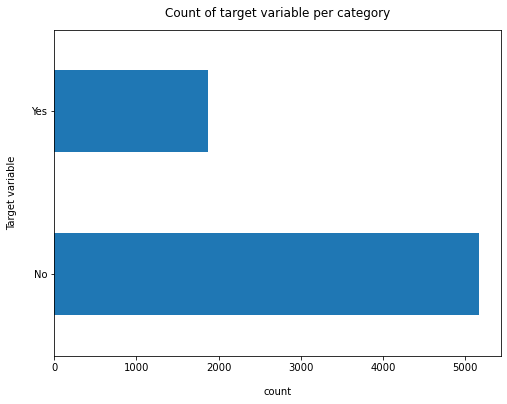

In [111]:
df['Churn'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel('count',labelpad=14)
plt.ylabel('Target variable',labelpad=14)
plt.title('Count of target variable per category',y=1.02)

plt.show()

In [112]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [113]:
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Data is highly imblance,ratio = 73:27

So we analyse the data with other features while taking the target values separately  to get some insights.

In [114]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


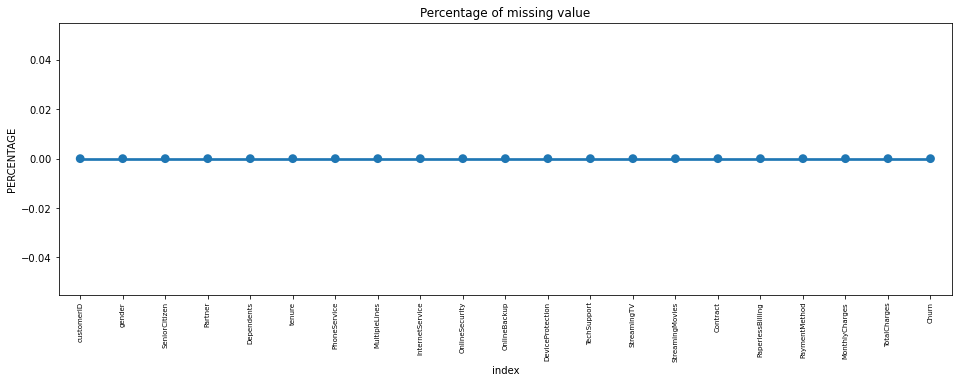

In [115]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()

plt.figure(figsize=(16,5))

ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90,fontsize=7)

plt.ylabel('PERCENTAGE')
plt.title('Percentage of missing value')

plt.show()


Here , there are no missing value

# Data Cleaning

Totalcharges should be numeric amount, let's convert it to numerical data type

In [116]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')

df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we can see that there are 11 missing values in TotalCharges

In [117]:
df.loc[df['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


# Missing value treatment

In [118]:
#percentage of missing value

missing_values=((7043-11)/7043)*100

print(100-missing_values,'%')

0.15618344455488398 %


Since % of these records compared to total dataset  is very low , so we can drop it

In [119]:
#removing missing values

df.dropna(how='any', inplace=True)

In [120]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [121]:
df['TotalCharges'].isnull().sum()

0

Divide customers into bins based on tenure  e.g for tenure <12 months. assign a tenure group if for tenure between 1 to 2 yrs tenure group of 13-24, so on

In [122]:
df['tenure'].nunique()

72

In [123]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

In [124]:
# get the max tenure

print(df['tenure'].max())

72


In [125]:
# Group the tenure in bins of 12 months

labels = ['{0} - {1}'.format(i, i + 11) for i in range (1,72,12)]

df['tenure_group'] = pd.cut(df.tenure, range(1,80,12), right=False, labels=labels)

In [126]:
df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

removing columns which is not required for further process

In [127]:
df.drop(columns=['customerID','tenure'],axis=1, inplace=True)

In [128]:
df.shape

(7032, 20)

# Data Exploration

Univariate Analysis

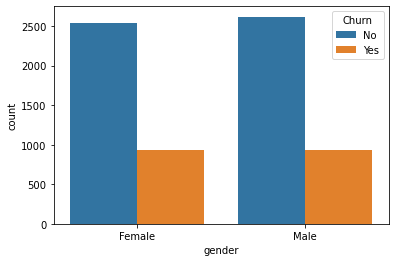

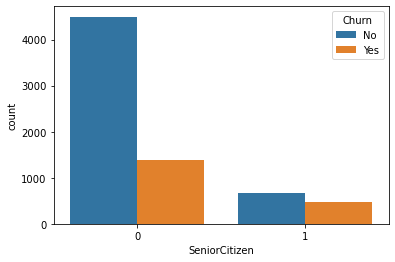

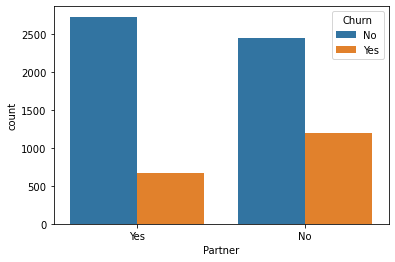

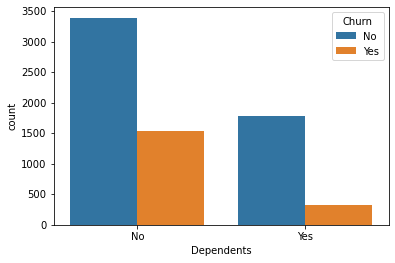

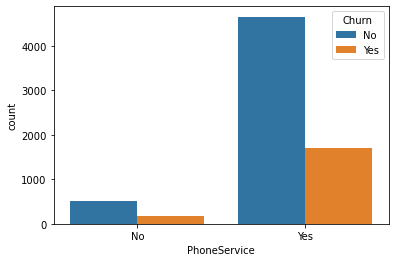

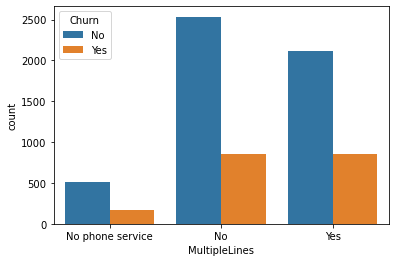

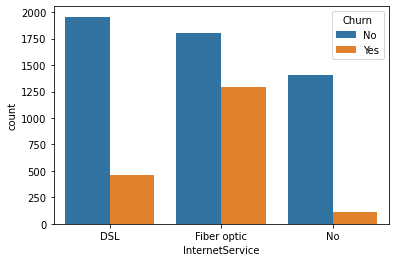

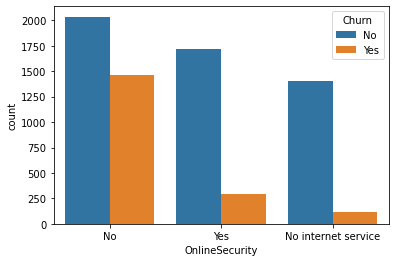

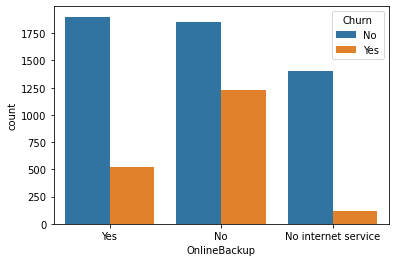

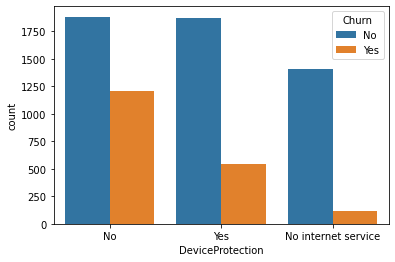

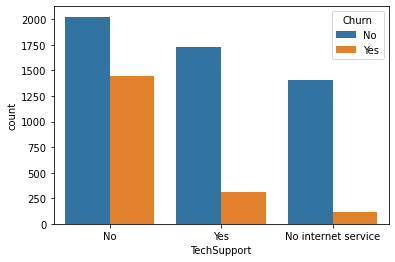

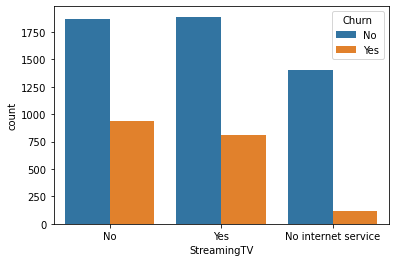

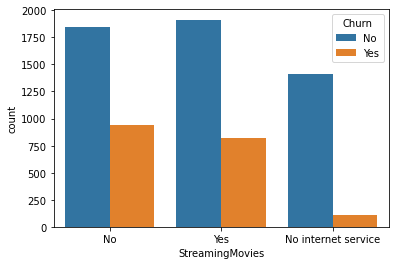

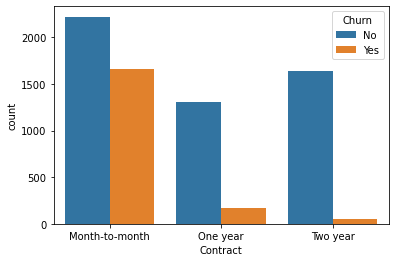

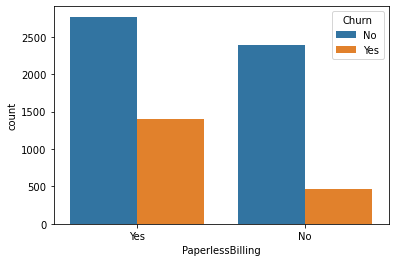

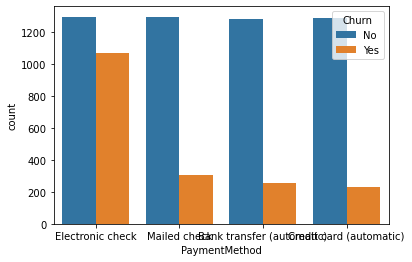

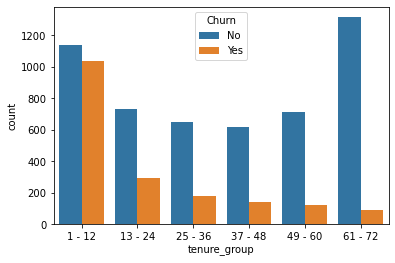

In [129]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df,x=predictor,hue='Churn')

Convert the target variable 'Churn' in a binary numeric variable yes=1, No=0

In [130]:
df['Churn'] = np.where(df.Churn == 'Yes',1,0)

In [131]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [132]:
df['Churn'].unique()

array([0, 1])

Convert all the categorical variable into dummy variable 

In [133]:
df_dummies=pd.get_dummies(df)
df_dummies

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0


Reletionship between MonthlyCharges and TotalCharges

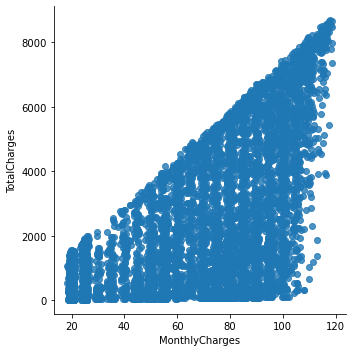

In [135]:
sns.lmplot(data=df_dummies, x='MonthlyCharges',y='TotalCharges', fit_reg=False)

Total charges increase as Monthly charges increase - as expected.

Churn by Monthly charges and Total Charges

Text(0.5, 1.0, 'Monthly charges by churn')

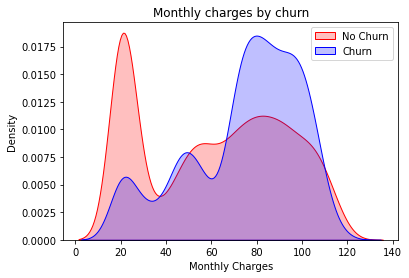

In [137]:
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn']==0)],color='Red',shade=True)

Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn']==1)],color='Blue',shade=True)

Mth.legend(['No Churn','Churn'],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')


Churn is high when Monthly charges is high

Text(0.5, 1.0, 'Total charges by churn')

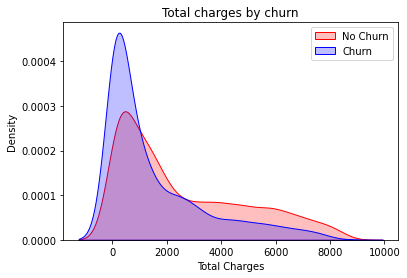

In [138]:
Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies['Churn']==0)],color='Red',shade=True)

Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies['Churn']==1)],color='Blue',shade=True)

Tot.legend(['No Churn','Churn'],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

high churn as lower total charges

Build a correlation of all predictors with Churn

<AxesSubplot:>

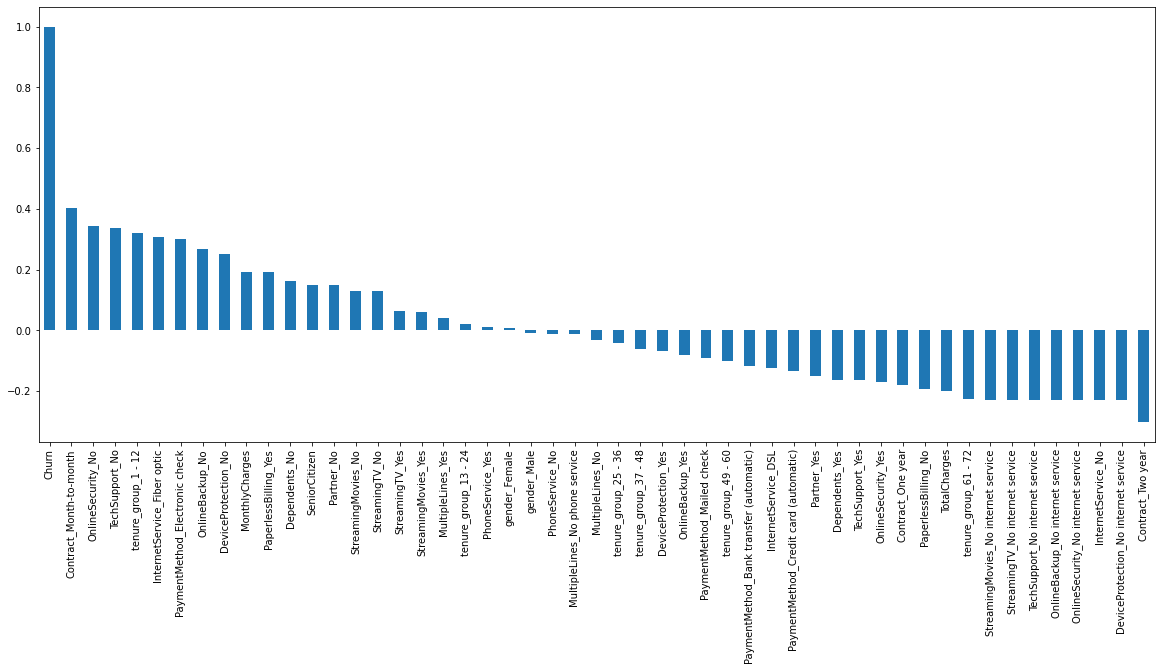

In [139]:
plt.figure(figsize=(20,8))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:>

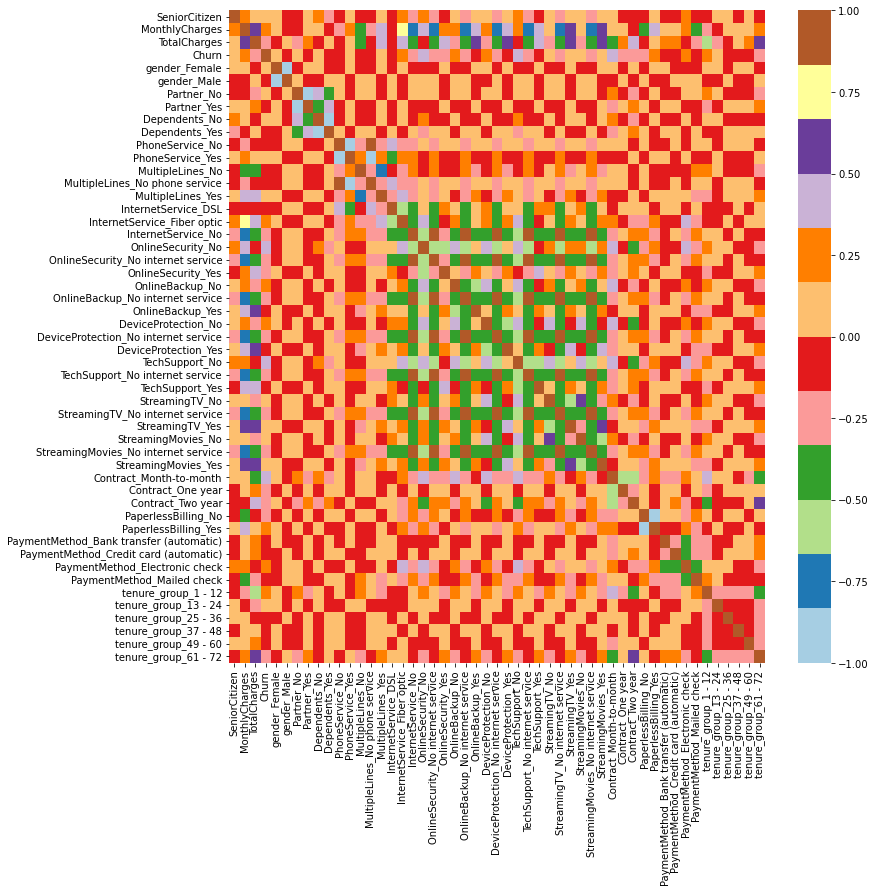

In [143]:
plt.figure(figsize=(12,12))

sns.heatmap(df_dummies.corr(),cmap='Paired')

High churn can seen in Month to Month contract, no online security,  No tech support, first years of subscription and fiber optics internet


low churn can seen in long term contracts subscriptions without internat service  and the customers engaged for 5+ years

fectors like Gender, Availability of phoneservice and of multiple lines almost have no impect on churn

Bivariate Analysis

In [144]:
new_df1_target0 =df.loc[df['Churn']==0]
new_df1_target1 =df.loc[df['Churn']==1]

In [150]:
def uniplot(df,col,title,hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize']=20
    plt.rcParams['axes.titlesize']=22
    plt.rcParams['axes.titlepad']=30
    
    
    temp=pd.Series(data=hue)
    fig,ax=plt.subplots()
    width=len(df[col].unique())+7+4*len(temp.unique())
    fig.set_size_inches(width,8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax=sns.countplot(data=df,x=col,order=df[col].value_counts().index,hue=hue,palette='bright')
    
    plt.show()
    

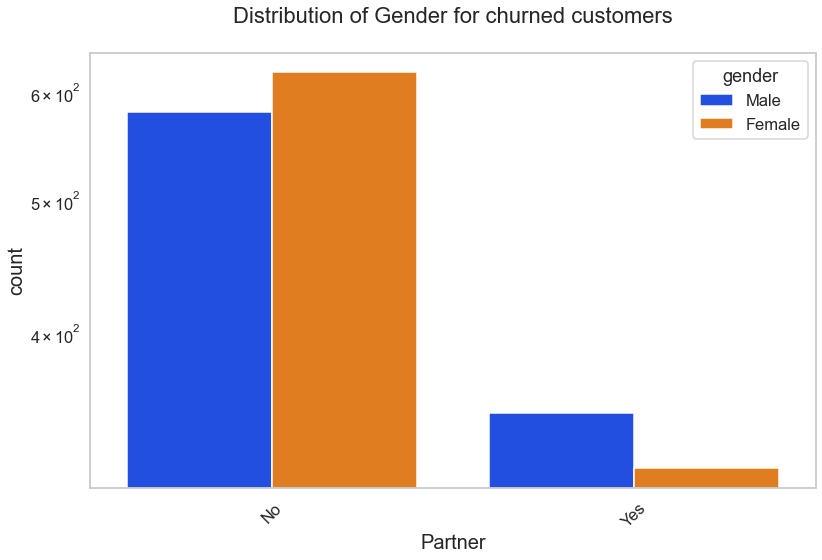

In [152]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for churned customers',hue='gender')

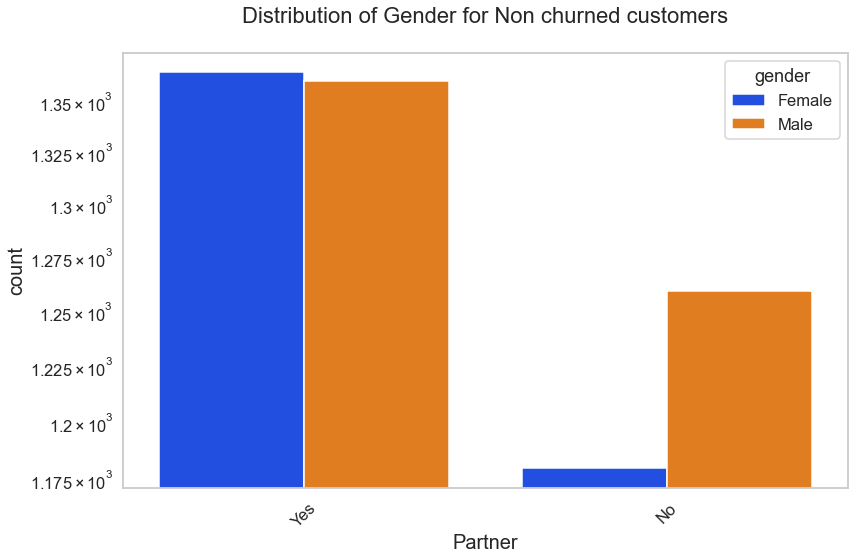

In [161]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non churned customers',hue='gender')

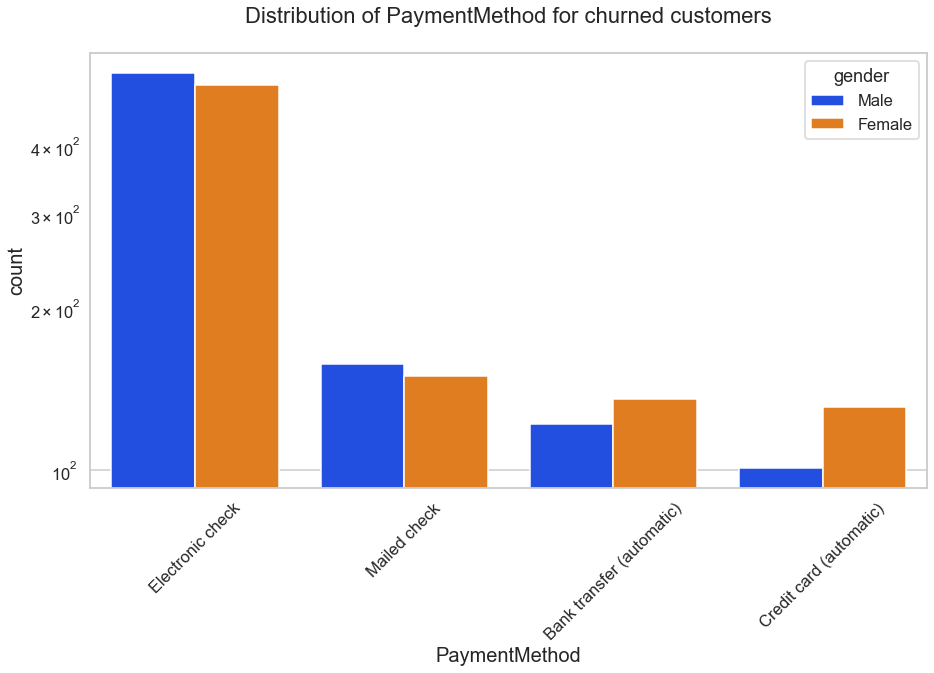

In [163]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for churned customers',hue='gender')

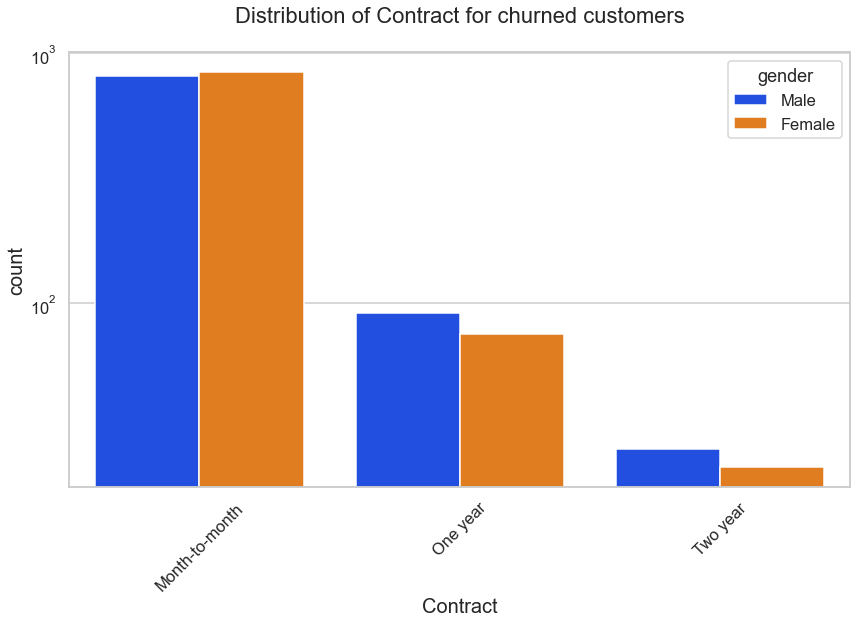

In [164]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for churned customers',hue='gender')

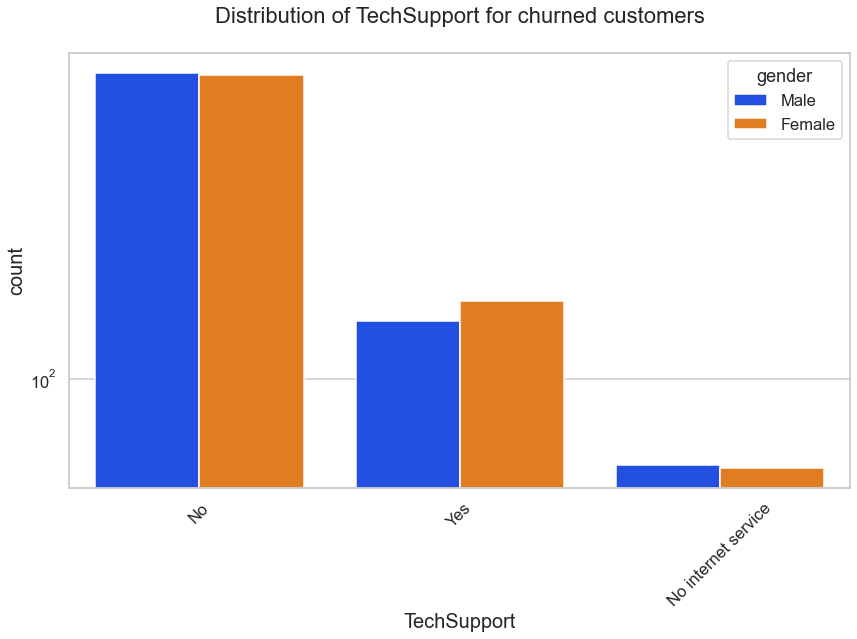

In [165]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for churned customers',hue='gender')

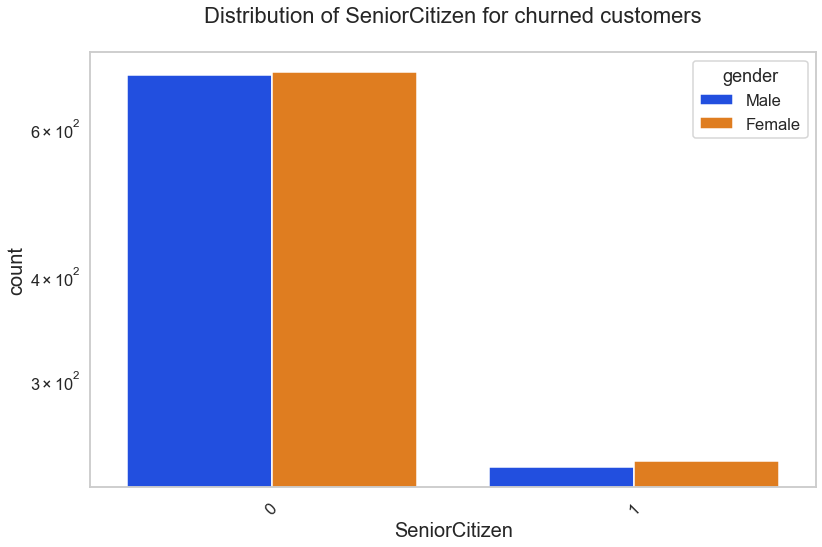

In [166]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for churned customers',hue='gender')

# Conclusion

these are some of the quick insights from this excercise

Electronic check medium are the higest churners

contract type - Monthly customers are more likely to churn because of no contract terms , as they are free to go customer

No online security , No Techsupport category are high churners

Non seniorCitizen are high churners



In [168]:
df_dummies.to_csv('cust_churn.csv')

In [169]:
df_dummies

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0


# Model Building

In [172]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN



In [174]:
df=pd.read_csv('cust_churn.csv')

In [175]:
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [176]:
df=df.drop('Unnamed: 0',axis=1)

In [178]:
df.head(5)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [183]:
# Creating x and y variables

x = df.drop('Churn', axis=1)

x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [186]:
y=df["Churn"]

In [187]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

# Imblanced data handling

In [260]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

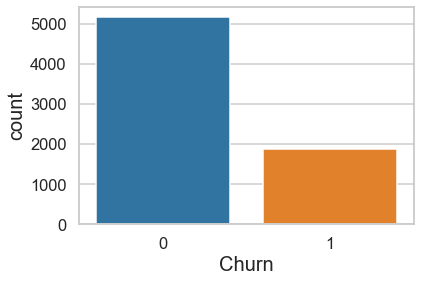

In [261]:
import seaborn as sns

sns.countplot(y)

In [262]:
from imblearn.over_sampling import SMOTE

In [263]:
smt=SMOTE()
x_train,y_train=smt.fit_resample(x,y)

In [264]:
y_train.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

Now, we can see that data is balanced

In [265]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [266]:
lr=LogisticRegression() #Logistic Regression
knn=KNeighborsClassifier() #KNearest Neibour 
dt=DecisionTreeClassifier() # Deciesion Tree
rf=RandomForestClassifier() # Random Forest
adb=AdaBoostClassifier()    # Adaboost Classifier 
svm=SVC()              # support vactor classifier        
gdboost=GradientBoostingClassifier() #Gradient Boosting Classifier
xgboost=XGBClassifier()  #Xtrim Gredient Boosting Classifier 

print("Model is created")

Model is created


We are using almost 8 models. Now its time to train out model.

In [267]:
lr.fit(x_train, y_train)
knn.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
adb.fit(x_train,y_train)
svm.fit(x_train,y_train)
gdboost.fit(x_train,y_train)
xgboost.fit(x_train,y_train)

print("Model is trained")

Model is trained


Our Model has been train now checking the accuracy:

In [268]:
print("Lr classification score",lr.score(x_train,y_train))
print("knn classification score",knn.score(x_train,y_train))
print("dt classification score",dt.score(x_train,y_train))
print("rf classification score",rf.score(x_train,y_train))
print("adb classification score",adb.score(x_train,y_train))
print("svm classification score",svm.score(x_train,y_train))
print("gdboost classification score",gdboost.score(x_train,y_train))
print("xgboost classification score",xgboost.score(x_train,y_train))

Lr classification score 0.8058666666666666
knn classification score 0.8280888888888889
dt classification score 0.9978666666666667
rf classification score 0.9978666666666667
adb classification score 0.8085333333333333
svm classification score 0.7354666666666667
gdboost classification score 0.8282666666666667
xgboost classification score 0.9376


Using confusion matrix in order to evaluate the models accuracy.

In [269]:
lr_yprad = lr.predict(x_test)
knn_yprad = knn.predict(x_test)
dt_yprad = dt.predict(x_test)
rf_yprad = rf.predict(x_test)
adb_yprad = adb.predict(x_test)
svm_yprad = svm.predict(x_test)
gdboost_yprad = gdboost.predict(x_test)
xgboost_yprad = xgboost.predict(x_test)

In [270]:
lr_conf_mat = confusion_matrix(y_test,lr_yprad)
print("confusion matrix for lr_model",'\n',lr_conf_mat)

confusion matrix for lr_model 
 [[940  86]
 [199 182]]


In [271]:
knn_conf_mat = confusion_matrix(y_test,knn_yprad)
print("confusion matrix for knn_model",'\n',knn_conf_mat)

confusion matrix for knn_model 
 [[910 116]
 [206 175]]


In [272]:
dt_conf_mat = confusion_matrix(y_test,dt_yprad)
print("confusion matrix for dt_model",'\n',dt_conf_mat)

confusion matrix for dt_model 
 [[825 201]
 [203 178]]


In [273]:
rf_conf_mat = confusion_matrix(y_test,rf_yprad)
print("confusion matrix for lr_model",'\n',rf_conf_mat)

confusion matrix for lr_model 
 [[920 106]
 [211 170]]


In [274]:
adb_conf_mat = confusion_matrix(y_test,adb_yprad)
print("confusion matrix for lr_model",'\n',adb_conf_mat)

confusion matrix for lr_model 
 [[933  93]
 [184 197]]


In [275]:
svm_conf_mat = confusion_matrix(y_test,svm_yprad)
print("confusion matrix for svm_model",'\n',svm_conf_mat)

confusion matrix for svm_model 
 [[1026    0]
 [ 381    0]]


In [276]:
gdboost_conf_mat = confusion_matrix(y_test,gdboost_yprad)
print("confusion matrix for gdboost_model",'\n',gdboost_conf_mat)

confusion matrix for gdboost_model 
 [[938  88]
 [188 193]]


Checking classification report for each model:

In [277]:
lr_report = classification_report(y_test,lr_yprad)
print(" lr classification_report" ,'\n',lr_report)

knn_report = classification_report(y_test,knn_yprad)
print(" knn classification_report" ,'\n',knn_report)

dt_report = classification_report(y_test,dt_yprad)
print(" dt classification_report" ,'\n',dt_report)


rf_report = classification_report(y_test,rf_yprad)
print(" rf classification_report" ,'\n',rf_report)


adb_report = classification_report(y_test,adb_yprad)
print(" adb classification_report" ,'\n',adb_report)


svm_report = classification_report(y_test,svm_yprad)
print(" svm classification_report" ,'\n',svm_report)


gdboost_report = classification_report(y_test,gdboost_yprad)
print(" gdboost classification_report" ,'\n',gdboost_report)

xgboost_report = classification_report(y_test,xgboost_yprad)
print(" xgboost classification_report" ,'\n',xgboost_report)


 lr classification_report 
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1026
           1       0.68      0.48      0.56       381

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407

 knn classification_report 
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1026
           1       0.60      0.46      0.52       381

    accuracy                           0.77      1407
   macro avg       0.71      0.67      0.69      1407
weighted avg       0.76      0.77      0.76      1407

 dt classification_report 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1026
           1       0.47      0.47      0.47       381

    accuracy                           0.71      1407
   macro avg       0.64      0.64      0.64

# ROC AUC Curve:

In [278]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve
#importing the ric and auc from sklearn and predect the x_test and 
print(roc_auc_score(y_test,lr.predict(x_test)))
print(roc_auc_score(y_test,knn.predict(x_test)))
print(roc_auc_score(y_test,dt.predict(x_test)))
print(roc_auc_score(y_test,rf.predict(x_test)))
print(roc_auc_score(y_test,adb.predict(x_test)))
print(roc_auc_score(y_test,svm.predict(x_test)))
print(roc_auc_score(y_test,gdboost.predict(x_test)))
print(roc_auc_score(y_test,xgboost.predict(x_test)))


0.6969348129729398
0.6731285782259674
0.6356425841506653
0.6714401927829197
0.7132085463001335
0.5
0.7103958496416017
0.6932625746343111


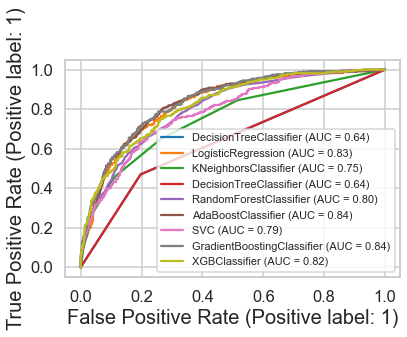

In [279]:
#lets find roc curve to check best fittted model

disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)  # here ax_ for axis with confustion matrics
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(adb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svm,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gdboost,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgboost,x_test,y_test,ax=disp.ax_)

plt.legend(prop = {'size':11}, loc ='lower right')

As per above also we can see our LogisticRegression,AdaBoostclassifier and GradientBoostingClassifier giving the best scores.

# K-Fold Cross Validation :

In [280]:
from sklearn.model_selection import KFold,cross_val_score
k_f = KFold(n_splits=4,shuffle=True)
k_f

KFold(n_splits=4, random_state=None, shuffle=True)

In [281]:
print("Mean of Cross validation score for adb  model","=>",cross_val_score(adb,x,y,cv=5).mean())
print("Cross validation score for lr model","=>",cross_val_score(lr,x,y,cv=5).mean())
print("Mean of Cross validation score for gdboost  model","=>",cross_val_score(gdboost,x,y,cv=5).mean())


Mean of Cross validation score for adb  model => 0.8010515397004007
Cross validation score for lr model => 0.800056312625048
Mean of Cross validation score for gdboost  model => 0.8036113882932421


As per above we can see our ‘lr’ model giving the less cross validation score. so we will consider this model is best for our prediction. Now will try hyperparameter tuning to check chances of accuracy increas

# HyperParameter Tuning !

In [282]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [283]:
# Creating the hyperparameter grid

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiating logistic regression classifier
logreg = LogisticRegression()

# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)

logreg_cv.fit(x, y)
 
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 268.2695795279727}
Best score is 0.8013365402210649


In [292]:
import pickle

In [294]:
filename = 'model.sav'

In [295]:
pickle.dump(df,open(filename,'wb'))

In [296]:
load_model = pickle.load(open(filename,'rb'))